# Codes for the article

## Real Datasets

In [1]:
RANDOM_STATE = 42

### Loading data

In [ ]:
from edgaro.data.dataset_array import load_benchmarking_set

In [ ]:
df = load_benchmarking_set()

In [ ]:
df.train_test_split(test_size=0.2, random_state=RANDOM_STATE)

### Balancing data

In [ ]:
from edgaro.balancing.nested_transformer import AutomaticTransformer
from edgaro.balancing.transformer_array import TransformerArray

In [ ]:
transformer = TransformerArray(
    AutomaticTransformer(
        keep_original_dataset=True,
        n_per_method=5,
        random_state=RANDOM_STATE
    ),
    set_suffixes=False
)

In [ ]:
transformer.fit(df)

In [ ]:
df_transformed = transformer.transform(df)

### Training models

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
from edgaro.model.model import RandomForest, ModelFromSKLEARN, XGBoost
from edgaro.model.model_array import ModelArray

In [ ]:
rf = ModelArray(RandomForest(n_jobs=-1, random_state=RANDOM_STATE))
lr = ModelArray(ModelFromSKLEARN(LogisticRegression(random_state=RANDOM_STATE)))
xgb = ModelArray(XGBoost(n_jobs=-1, random_state=RANDOM_STATE))

In [ ]:
rf.fit(df_transformed)
lr.fit(df_transformed)
xgb.fit(df_transformed)

### Balanced accuracy

In [ ]:
rf_evals = rf.evaluate(
    metrics_output_class=[balanced_accuracy_score],
    metrics_output_probabilities=None
)

In [ ]:
lr_evals = lr.evaluate(
    metrics_output_class=[balanced_accuracy_score],
    metrics_output_probabilities=None
)

In [ ]:
xgb_evals = xgb.evaluate(
    metrics_output_class=[balanced_accuracy_score],
    metrics_output_probabilities=None
)

### Explaining

In [ ]:
from edgaro.explain.explainer_array import ExplainerArray

In [ ]:
explainer_array_pdp_rf = ExplainerArray(rf, N=None, explanation_type='PDP', random_state=RANDOM_STATE)
explainer_array_pdp_rf.fit()
pdp_rf = explainer_array_pdp_rf.transform()

explainer_array_ale_rf = ExplainerArray(rf, N=None, explanation_type='ALE', random_state=RANDOM_STATE)
explainer_array_ale_rf.fit()
ale_rf = explainer_array_ale_rf.transform()

explainer_array_vi_rf = ExplainerArray(rf, N=None, explanation_type='VI', random_state=RANDOM_STATE)
explainer_array_vi_rf.fit()
vi_rf = explainer_array_vi_rf.transform()

In [ ]:
explainer_array_pdp_lr = ExplainerArray(lr, N=None, explanation_type='PDP', random_state=RANDOM_STATE)
explainer_array_pdp_lr.fit()
pdp_lr = explainer_array_pdp_lr.transform()

explainer_array_ale_lr = ExplainerArray(lr, N=None, explanation_type='ALE', random_state=RANDOM_STATE)
explainer_array_ale_lr.fit()
ale_lr = explainer_array_ale_lr.transform()

explainer_array_vi_lr = ExplainerArray(lr, N=None, explanation_type='VI', random_state=RANDOM_STATE)
explainer_array_vi_lr.fit()
vi_lr = explainer_array_vi_lr.transform()

In [ ]:
explainer_array_pdp_xgb = ExplainerArray(xgb, N=None, explanation_type='PDP')
explainer_array_pdp_xgb.fit()
pdp_xgb = explainer_array_pdp_xgb.transform()

explainer_array_ale_xgb = ExplainerArray(xgb, N=None, explanation_type='ALE')
explainer_array_ale_xgb.fit()
ale_xgb = explainer_array_ale_xgb.transform()

explainer_array_vi_xgb = ExplainerArray(xgb, N=None, explanation_type='VI')
explainer_array_vi_xgb.fit()
vi_xgb = explainer_array_vi_xgb.transform()

##### Sorting

In [ ]:
def sort(obj):
    obj.results = sorted(obj.results, key=lambda x: x.name.lower())

In [ ]:
sort(pdp_rf)
sort(ale_rf)
sort(vi_rf)

sort(pdp_lr)
sort(ale_lr)
sort(vi_lr)

sort(pdp_xgb)
sort(ale_xgb)
sort(vi_xgb)

### Visualisations

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
sns.set_style("whitegrid")

#### PDP

Methods

In [ ]:
names = [
    'Random Undersampling',
    'Near Miss (undersampling)',
    'Random Oversampling',
    'SMOTE (oversampling)',
    'Borderline SMOTE (oversampling)',
    'SMOTETomek (hybrid)'
]

In [ ]:
methods = [
    'UNDERSAMPLING__Random',
    'UNDERSAMPLING__Near_Miss',
    'OVERSAMPLING__Random',
    'OVERSAMPLING__SMOTE',
    'OVERSAMPLING__Borderline_SMOTE',
    'COMBINED__SMOTE_Tomek'
]

In [ ]:
pdp_rf_summary_results = pdp_rf.plot_summary(model_filters=[m + '.*BASE_IR=0.0IR_RANGE' for m in methods], return_df=True)
plt.close()

pdp_lr_summary_results = pdp_lr.plot_summary(model_filters=[m + '.*BASE_IR=0.0IR_RANGE' for m in methods], return_df=True)
plt.close()

pdp_xgb_summary_results = pdp_xgb.plot_summary(model_filters=[m + '.*BASE_IR=0.0IR_RANGE' for m in methods], return_df=True)
plt.close()

In [ ]:
tmp = pd.DataFrame({'Method': [], 'Model': [], 'SDD values [$10^{-3}$]': []})

for i in range(len(names)):
    n = len(pdp_rf_summary_results[i])
    tmp2 = pd.DataFrame({'Method': [names[i] for _ in range(n)], 'Model': ['Random Forest' for _ in range(n)], 'SDD values [$10^{-3}$]': pdp_rf_summary_results[i]})
    n = len(pdp_lr_summary_results[i])
    tmp1 = pd.DataFrame({'Method': [names[i] for _ in range(n)], 'Model': ['Logistic Regression' for _ in range(n)], 'SDD values [$10^{-3}$]': pdp_lr_summary_results[i]})
    n = len(pdp_xgb_summary_results[i])
    tmp3 = pd.DataFrame({'Method': [names[i] for _ in range(n)], 'Model': ['XGBoost' for _ in range(n)], 'SDD values [$10^{-3}$]': pdp_xgb_summary_results[i]})
    tmp = pd.concat([tmp, tmp2, tmp1, tmp3])

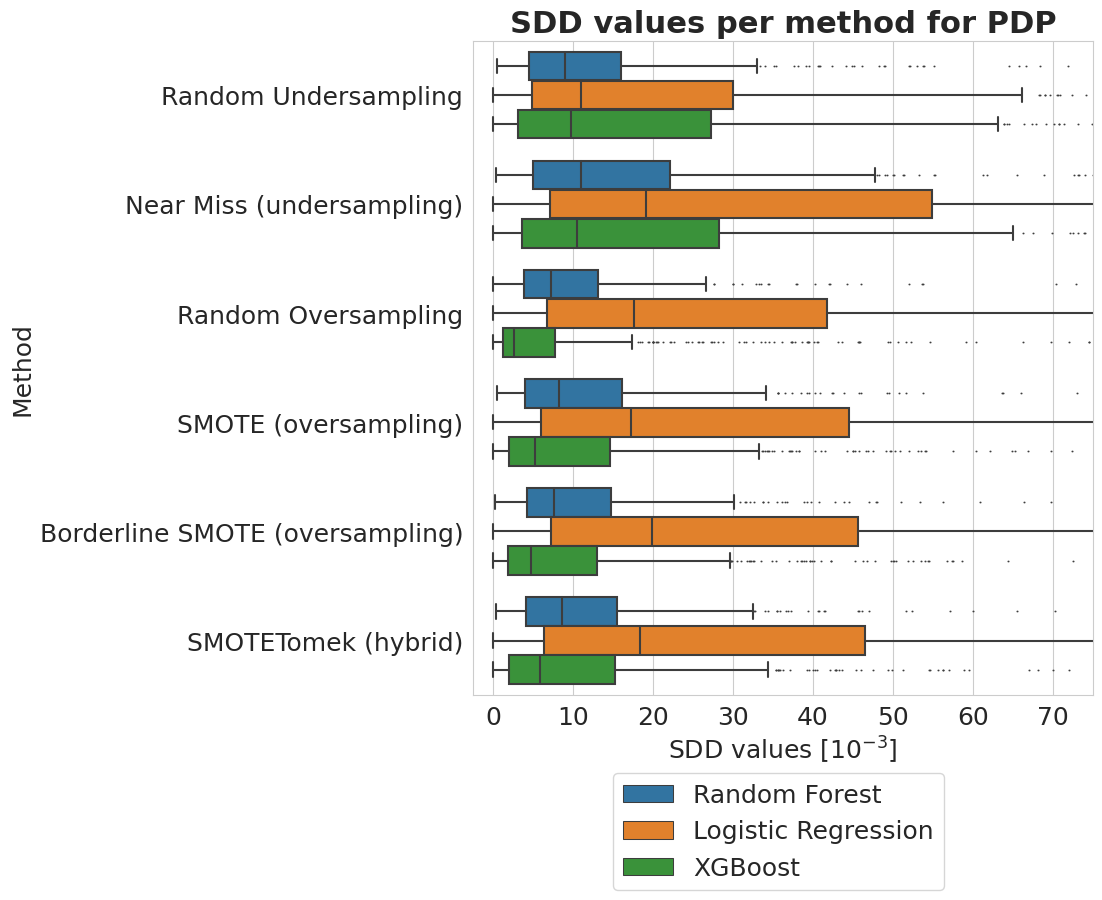

In [177]:
plt.figure(figsize=(8, 8.5))
ax = sns.boxplot(y = 'Method', x = 'SDD values [$10^{-3}$]', hue='Model', data=tmp, fliersize=0.5)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda value, tick_number: str(int(value * 10 ** 3))))
plt.xlim(-2.5*10**(-3), 75*10**(-3))
plt.xticks(np.arange(0, 80, 10)*10**(-3))

lgd = plt.legend(bbox_to_anchor=(0.78, -0.1), fontsize=18)
plt.title('SDD values per method for PDP', fontsize=22, weight='bold')
plt.xlabel('SDD values [$10^{-3}$]', fontsize=18)
plt.ylabel('Method', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('sdd_pdp_methods.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

Unbalancedness

In [60]:
unbalancedness = ['=0.8IR_RANGE', '=0.6IR_RANGE', '=0.4IR_RANGE', '=0.2IR_RANGE', '=0.0IR_RANGE']
unbalancedness_filters = ['0.8IR_RANGE', '0.6IR_RANGE', '0.4IR_RANGE', '0.2IR_RANGE', '0.0IR_RANGE']
vals = ['0.8', '0.6', '0.4', '0.2', '0.0']

In [61]:
pdp_rf_unbalancedness_summary_results = pdp_rf.plot_summary(unbalancedness_filters, return_df=True)
plt.close()

pdp_lr_unbalancedness_summary_results = pdp_lr.plot_summary(unbalancedness_filters, return_df=True)
plt.close()

pdp_xgb_unbalancedness_summary_results = pdp_xgb.plot_summary(unbalancedness_filters,return_df=True)
plt.close()

In [62]:
tmp = pd.DataFrame({'Unbalancedness': [], 'Model': [], 'SDD values [$10^{-3}$]': []})

for i in range(len(unbalancedness)):
    n = len(pdp_rf_unbalancedness_summary_results[i])
    tmp2 = pd.DataFrame({'Unbalancedness': [vals[i] for _ in range(n)], 'Model': ['Weighted Random Forest' for _ in range(n)], 'SDD values [$10^{-3}$]': pdp_rf_unbalancedness_summary_results[i]})
    tmp = pd.concat([tmp, tmp2])

for i in range(len(unbalancedness)):
    n = len(pdp_lr_unbalancedness_summary_results[i])
    tmp1 = pd.DataFrame({'Unbalancedness': [vals[i] for _ in range(n)], 'Model': ['Logistic Regression' for _ in range(n)], 'SDD values [$10^{-3}$]': pdp_lr_unbalancedness_summary_results[i]})
    tmp = pd.concat([tmp, tmp1])

for i in range(len(unbalancedness)):
    n = len(pdp_xgb_unbalancedness_summary_results[i])
    tmp1 = pd.DataFrame({'Unbalancedness': [vals[i] for _ in range(n)], 'Model': ['XGBoost' for _ in range(n)], 'SDD values [$10^{-3}$]': pdp_xgb_unbalancedness_summary_results[i]})
    tmp = pd.concat([tmp, tmp1])

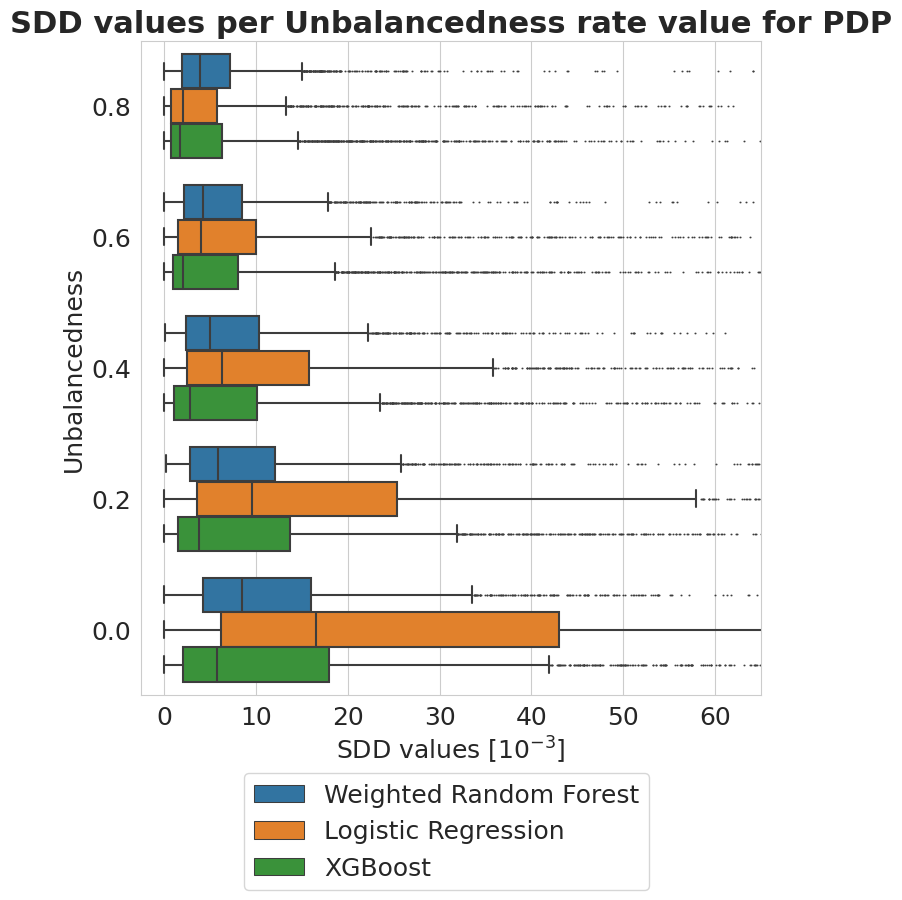

In [74]:
plt.figure(figsize=(8, 8.5))
ax = sns.boxplot(y = 'Unbalancedness', x = 'SDD values [$10^{-3}$]', hue='Model', data=tmp, fliersize=0.5)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda value, tick_number: str(int(value * 10 ** 3))))
plt.xlim(-2.5*10**(-3), 65*10**(-3))
plt.xticks(np.arange(0, 70, 10)*10**(-3))

lgd = plt.legend(bbox_to_anchor=(0.84, -0.1), fontsize=18)
plt.title('SDD values per Unbalancedness rate value for PDP', fontsize=22, weight='bold')
plt.xlabel('SDD values [$10^{-3}$]', fontsize=18)
plt.ylabel('Unbalancedness', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('sdd_pdp_unbalancedness.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### ALE

Methods

In [ ]:
names = [
    'Random Undersampling',
    'Near Miss (undersampling)',
    'Random Oversampling',
    'SMOTE (oversampling)',
    'Borderline SMOTE (oversampling)',
    'SMOTETomek (hybrid)'
]

In [ ]:
methods = [
    'UNDERSAMPLING__Random',
    'UNDERSAMPLING__Near_Miss',
    'OVERSAMPLING__Random',
    'OVERSAMPLING__SMOTE',
    'OVERSAMPLING__Borderline_SMOTE',
    'COMBINED__SMOTE_Tomek'
]

In [64]:
ale_rf_summary_results = ale_rf.plot_summary(model_filters=[m + '.*BASE_IR=0.0IR_RANGE' for m in methods], return_df=True)
plt.close()

ale_lr_summary_results = ale_lr.plot_summary(model_filters=[m + '.*BASE_IR=0.0IR_RANGE' for m in methods], return_df=True)
plt.close()

ale_xgb_summary_results = ale_xgb.plot_summary(model_filters=[m + '.*BASE_IR=0.0IR_RANGE' for m in methods], return_df=True)
plt.close()

In [66]:
tmp = pd.DataFrame({'Method': [], 'Model': [], 'SDD values [$10^{-3}$]': []})

for i in range(len(names)):
    n = len(ale_rf_summary_results[i])
    tmp2 = pd.DataFrame({'Method': [names[i] for _ in range(n)], 'Model': ['Random Forest' for _ in range(n)], 'SDD values [$10^{-3}$]': ale_rf_summary_results[i]})
    n = len(ale_lr_summary_results[i])
    tmp1 = pd.DataFrame({'Method': [names[i] for _ in range(n)], 'Model': ['Logistic Regression' for _ in range(n)], 'SDD values [$10^{-3}$]': ale_lr_summary_results[i]})
    n = len(ale_xgb_summary_results[i])
    tmp3 = pd.DataFrame({'Method': [names[i] for _ in range(n)], 'Model': ['XGBoost' for _ in range(n)], 'SDD values [$10^{-3}$]': ale_xgb_summary_results[i]})
    tmp = pd.concat([tmp, tmp2, tmp1, tmp3])

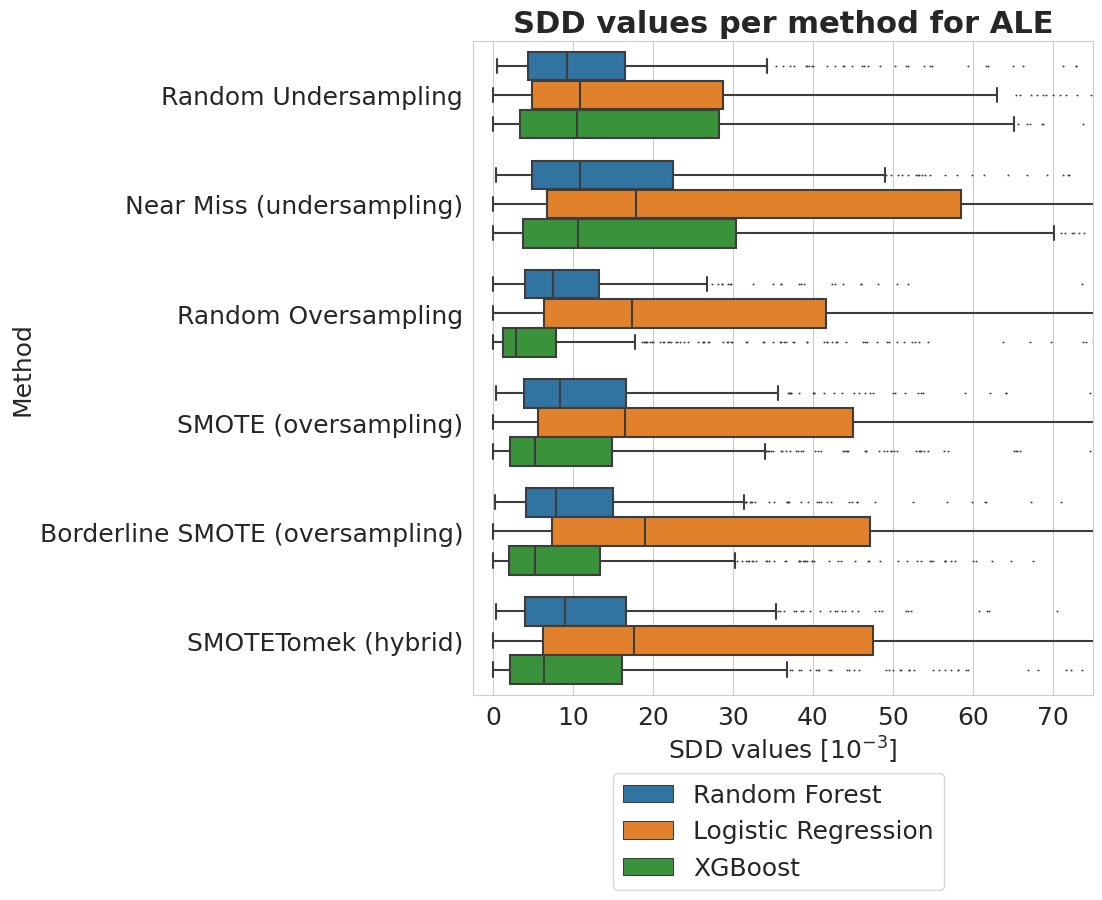

In [181]:
plt.figure(figsize=(8, 8.5))
ax = sns.boxplot(y = 'Method', x = 'SDD values [$10^{-3}$]', hue='Model', data=tmp, fliersize=0.5)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda value, tick_number: str(int(value * 10 ** 3))))
plt.xlim(-2.5*10**(-3), 75*10**(-3))
plt.xticks(np.arange(0, 80, 10)*10**(-3))

lgd = plt.legend(bbox_to_anchor=(0.78, -0.1), fontsize=18)
plt.title('SDD values per method for ALE', fontsize=22, weight='bold')
plt.xlabel('SDD values [$10^{-3}$]', fontsize=18)
plt.ylabel('Method', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('sdd_ale_methods.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

Unbalancedness

In [60]:
unbalancedness = ['=0.8IR_RANGE', '=0.6IR_RANGE', '=0.4IR_RANGE', '=0.2IR_RANGE', '=0.0IR_RANGE']
unbalancedness_filters = ['0.8IR_RANGE', '0.6IR_RANGE', '0.4IR_RANGE', '0.2IR_RANGE', '0.0IR_RANGE']
vals = ['0.8', '0.6', '0.4', '0.2', '0.0']

In [75]:
ale_rf_unbalancedness_summary_results = ale_rf.plot_summary(unbalancedness_filters, return_df=True)
plt.close()

ale_lr_unbalancedness_summary_results = ale_lr.plot_summary(unbalancedness_filters,return_df=True)
plt.close()

ale_xgb_unbalancedness_summary_results = ale_xgb.plot_summary(unbalancedness_filters, return_df=True)
plt.close()

In [76]:
tmp = pd.DataFrame({'Unbalancedness': [], 'Model': [], 'SDD values [$10^{-3}$]': []})

for i in range(len(unbalancedness)):
    n = len(ale_rf_unbalancedness_summary_results[i])
    tmp2 = pd.DataFrame({'Unbalancedness': [vals[i] for _ in range(n)], 'Model': ['Weighted Random Forest' for _ in range(n)], 'SDD values [$10^{-3}$]': ale_rf_unbalancedness_summary_results[i]})
    tmp = pd.concat([tmp, tmp2])

for i in range(len(unbalancedness)):
    n = len(ale_lr_unbalancedness_summary_results[i])
    tmp1 = pd.DataFrame({'Unbalancedness': [vals[i] for _ in range(n)], 'Model': ['Logistic Regression' for _ in range(n)], 'SDD values [$10^{-3}$]': ale_lr_unbalancedness_summary_results[i]})
    tmp = pd.concat([tmp, tmp1])

for i in range(len(unbalancedness)):
    n = len(ale_xgb_unbalancedness_summary_results[i])
    tmp1 = pd.DataFrame({'Unbalancedness': [vals[i] for _ in range(n)], 'Model': ['XGBoost' for _ in range(n)], 'SDD values [$10^{-3}$]': ale_xgb_unbalancedness_summary_results[i]})
    tmp = pd.concat([tmp, tmp1])

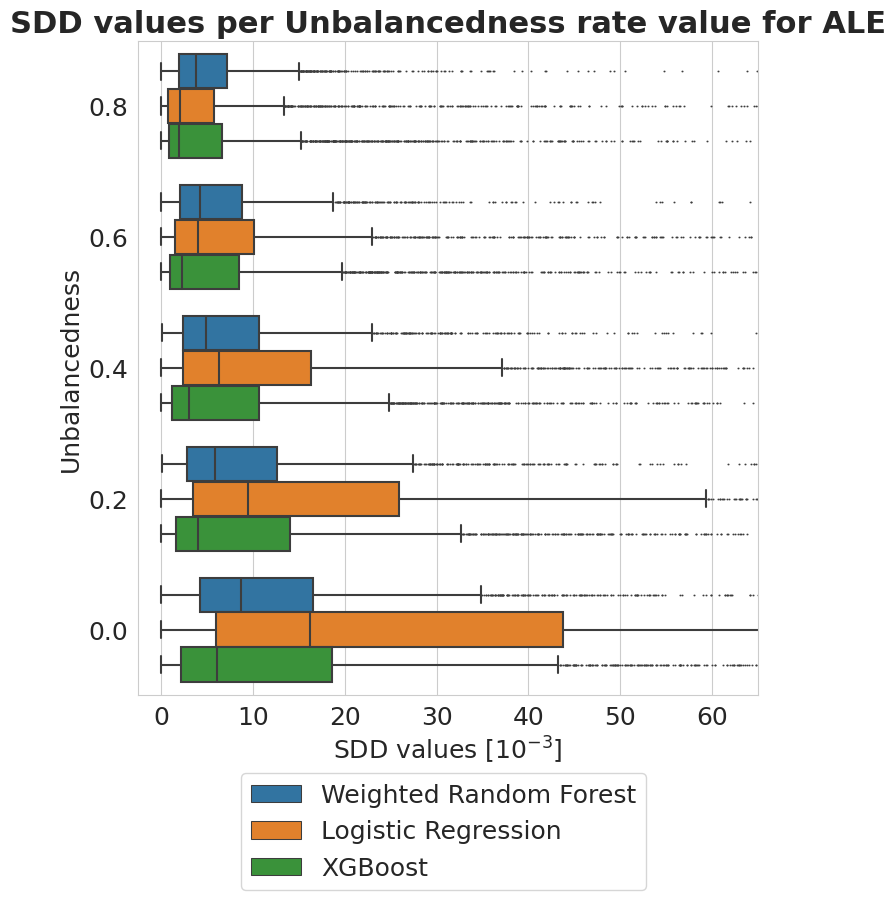

In [82]:
plt.figure(figsize=(8, 8.5))
ax = sns.boxplot(y = 'Unbalancedness', x = 'SDD values [$10^{-3}$]', hue='Model', data=tmp, fliersize=0.5)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda value, tick_number: str(int(value * 10 ** 3))))
plt.xlim(-2.5*10**(-3), 65*10**(-3))
plt.xticks(np.arange(0, 70, 10)*10**(-3))

lgd = plt.legend(bbox_to_anchor=(0.84, -0.1), fontsize=18)
plt.title('SDD values per Unbalancedness rate value for ALE', fontsize=22, weight='bold')
plt.xlabel('SDD values [$10^{-3}$]', fontsize=18)
plt.ylabel('Unbalancedness', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('sdd_ale_unbalancedness.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### VI

Methods

In [ ]:
names = [
    'Random Undersampling',
    'Near Miss (undersampling)',
    'Random Oversampling',
    'SMOTE (oversampling)',
    'Borderline SMOTE (oversampling)',
    'SMOTETomek (hybrid)'
]

In [ ]:
methods = [
    'UNDERSAMPLING__Random',
    'UNDERSAMPLING__Near_Miss',
    'OVERSAMPLING__Random',
    'OVERSAMPLING__SMOTE',
    'OVERSAMPLING__Borderline_SMOTE',
    'COMBINED__SMOTE_Tomek'
]

In [ ]:
def extract_accepted_rejected(tab, significance_level):
    n = len(tab)
    res = np.array(tab)
    reject = np.sum(res <= significance_level)
    accept = n - reject
    return accept / n, reject / n

In [ ]:
vi_rf_summary_results = vi_rf.plot_summary(model_filters=methods, significance_level=0.05, return_df=True)
plt.close()

vi_lr_summary_results = vi_lr.plot_summary(model_filters=methods, significance_level=0.05, return_df=True)
plt.close()

vi_xgb_summary_results = vi_xgb.plot_summary(model_filters=methods, significance_level=0.05, return_df=True)
plt.close()

In [ ]:
vi_lr_summary_results_accepted = [extract_accepted_rejected(q, 0.05) for q in vi_lr_summary_results]
vi_xgb_summary_results_accepted = [extract_accepted_rejected(q, 0.05) for q in vi_xgb_summary_results]
vi_rf_summary_results_accepted = [extract_accepted_rejected(q, 0.05) for q in vi_rf_summary_results]

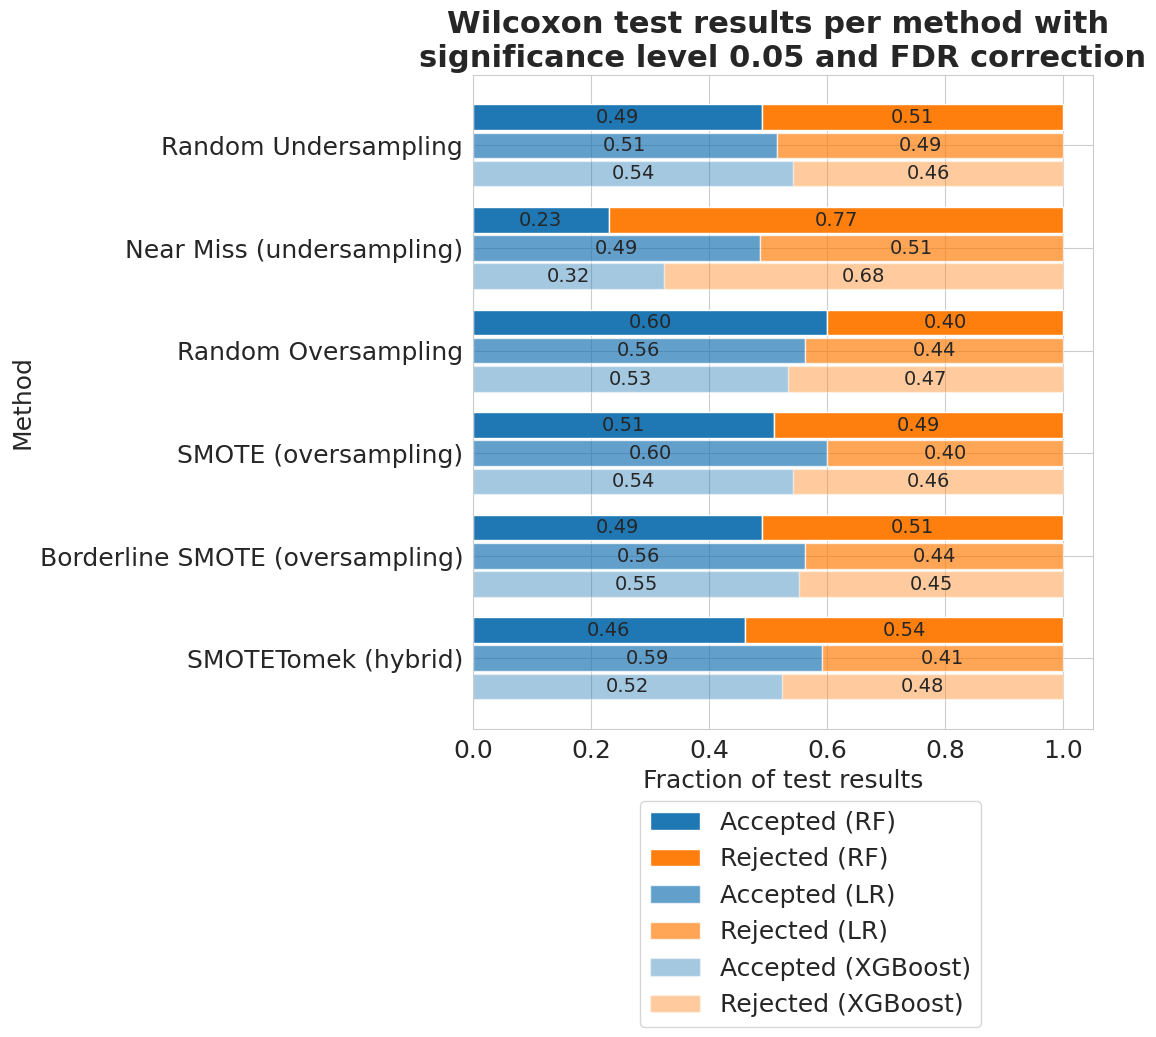

In [90]:
height = 0.25

plt.figure(figsize=(8, 8.5))

r = np.arange(len(methods)) - height - 0.025
bottom = [q[0] for q in vi_rf_summary_results_accepted]
top = [q[1] for q in vi_rf_summary_results_accepted]
bar1 = plt.barh(r, bottom, height=height, label='Accepted (RF)', color='#1f77b4')
bar2 = plt.barh(r, top, left=bottom, height=height, label='Rejected (RF)', color='#ff7f0e')

r = np.arange(len(methods))
bottom = [q[0] for q in vi_lr_summary_results_accepted]
top = [q[1] for q in vi_lr_summary_results_accepted]
bar3 = plt.barh(r, bottom, height=height, label='Accepted (LR)', color='#1f77b4', alpha=0.7)
bar4 = plt.barh(r, top, left=bottom, height=height, label='Rejected (LR)', color='#ff7f0e', alpha=0.7)

r = np.arange(len(methods)) + height + 0.025
bottom = [q[0] for q in vi_xgb_summary_results_accepted]
top = [q[1] for q in vi_xgb_summary_results_accepted]
bar5 = plt.barh(r, bottom, height=height, label='Accepted (XGBoost)', color='#1f77b4', alpha=0.4)
bar6 = plt.barh(r, top, left=bottom, height=height, label='Rejected (XGBoost)', color='#ff7f0e', alpha=0.4)

plt.yticks(np.arange(len(methods)), names)
plt.gca().invert_yaxis()

lgd = plt.legend(bbox_to_anchor=(0.84, -0.09), fontsize=18)
plt.title('Wilcoxon test results per method with \nsignificance level 0.05 and FDR correction', fontsize=22, weight='bold')
plt.xlabel('Fraction of test results', fontsize=18)
plt.ylabel('Method', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax = plt.gca()
ax.bar_label(bar1, labels = [f'{b.get_width():.2f}' if b.get_width() != 0 else '' for b in bar1], label_type='center', fontsize=14)
ax.bar_label(bar2, labels = [f'{b.get_width():.2f}' if b.get_width() != 0 else '' for b in bar2], label_type='center', fontsize=14)
ax.bar_label(bar3, labels = [f'{b.get_width():.2f}' if b.get_width() != 0 else '' for b in bar3], label_type='center', fontsize=14)
ax.bar_label(bar4, labels = [f'{b.get_width():.2f}' if b.get_width() != 0 else '' for b in bar4], label_type='center', fontsize=14)
ax.bar_label(bar5, labels = [f'{b.get_width():.2f}' if b.get_width() != 0 else '' for b in bar5], label_type='center', fontsize=14)
ax.bar_label(bar6, labels = [f'{b.get_width():.2f}' if b.get_width() != 0 else '' for b in bar6], label_type='center', fontsize=14)

plt.savefig('vi_methods.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

Unbalancedness

In [ ]:
unbalancedness = ['=0.8IR_RANGE', '=0.6IR_RANGE', '=0.4IR_RANGE', '=0.2IR_RANGE', '=0.0IR_RANGE']
unbalancedness_filters = ['0.8IR_RANGE', '0.6IR_RANGE', '0.4IR_RANGE', '0.2IR_RANGE', '0.0IR_RANGE']
vals = ['0.8', '0.6', '0.4', '0.2', '0.0']

In [ ]:
vi_rf_summary_results = vi_rf.plot_summary(model_filters=unbalancedness_filters, figsize=(18, 6), significance_level=0.05, return_df=True)
plt.close()

vi_lr_summary_results = vi_lr.plot_summary(model_filters=unbalancedness_filters, figsize=(18, 6), significance_level=0.05, return_df=True)
plt.close()

vi_xgb_summary_results = vi_xgb.plot_summary(model_filters=unbalancedness_filters, figsize=(18, 6), significance_level=0.05, return_df=True)
plt.close()

In [ ]:
vi_rf_summary_results_accepted = [extract_accepted_rejected(q, 0.05) for q in vi_rf_summary_results]
vi_lr_summary_results_accepted = [extract_accepted_rejected(q, 0.05) for q in vi_lr_summary_results]
vi_xgb_summary_results_accepted = [extract_accepted_rejected(q, 0.05) for q in vi_xgb_summary_results]

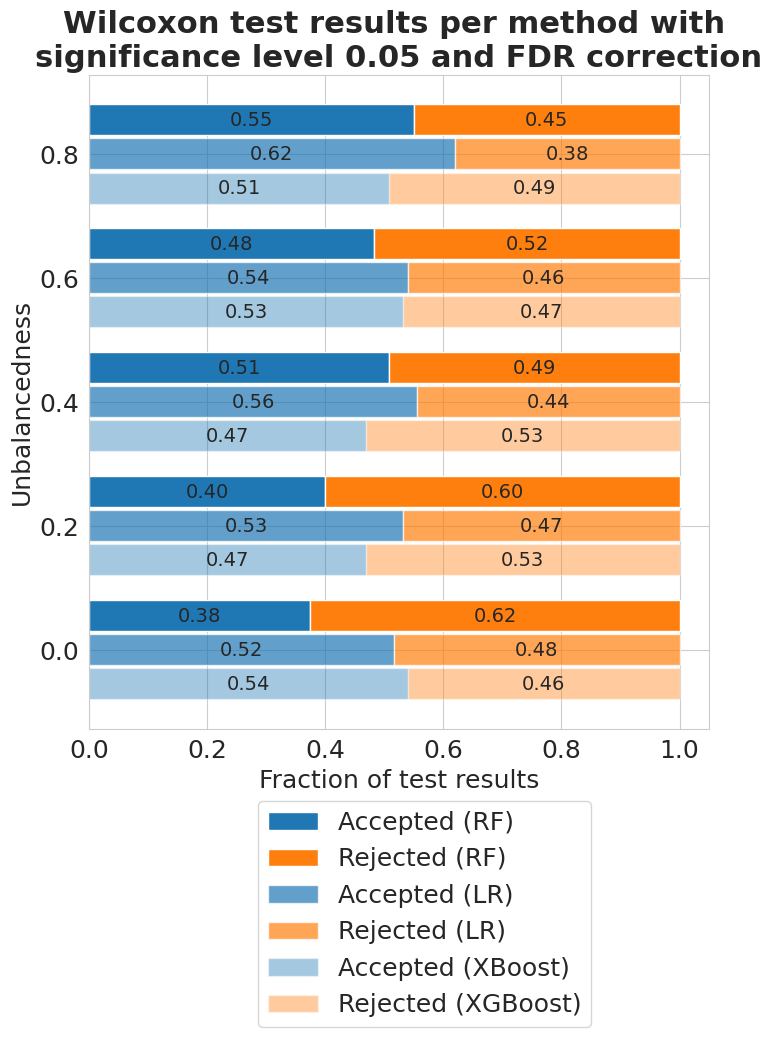

In [97]:
height = 0.25

plt.figure(figsize=(8, 8.5))

r = np.arange(len(vals)) - height - 0.025
bottom = [q[0] for q in vi_rf_summary_results_accepted]
top = [q[1] for q in vi_rf_summary_results_accepted]
bar1 = plt.barh(r, bottom, height=height, label='Accepted (RF)', color='#1f77b4')
bar2 = plt.barh(r, top, left=bottom, height=height, label='Rejected (RF)', color='#ff7f0e')

r = np.arange(len(vals))
bottom = [q[0] for q in vi_lr_summary_results_accepted]
top = [q[1] for q in vi_lr_summary_results_accepted]
bar3 = plt.barh(r, bottom, height=height, label='Accepted (LR)', color='#1f77b4', alpha=0.7)
bar4 = plt.barh(r, top, left=bottom, height=height, label='Rejected (LR)', color='#ff7f0e', alpha=0.7)

r = np.arange(len(vals)) + height + 0.025
bottom = [q[0] for q in vi_xgb_summary_results_accepted]
top = [q[1] for q in vi_xgb_summary_results_accepted]
bar5 = plt.barh(r, bottom, height=height, label='Accepted (XBoost)', color='#1f77b4', alpha=0.4)
bar6 = plt.barh(r, top, left=bottom, height=height, label='Rejected (XGBoost)', color='#ff7f0e', alpha=0.4)

plt.yticks(np.arange(len(vals)), vals)
plt.gca().invert_yaxis()
lgd = plt.legend(bbox_to_anchor=(0.83, -0.09), fontsize=18)
plt.title('Wilcoxon test results per method with \nsignificance level 0.05 and FDR correction', fontsize=22, weight='bold')
plt.xlabel('Fraction of test results', fontsize=18)
plt.ylabel('Unbalancedness', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax = plt.gca()
ax.bar_label(bar1, labels = [f'{b.get_width():.2f}' if b.get_width() != 0 else '' for b in bar1], label_type='center', fontsize=14)
ax.bar_label(bar2, labels = [f'{b.get_width():.2f}' if b.get_width() != 0 else '' for b in bar2], label_type='center', fontsize=14)
ax.bar_label(bar3, labels = [f'{b.get_width():.2f}' if b.get_width() != 0 else '' for b in bar3], label_type='center', fontsize=14)
ax.bar_label(bar4, labels = [f'{b.get_width():.2f}' if b.get_width() != 0 else '' for b in bar4], label_type='center', fontsize=14)
ax.bar_label(bar5, labels = [f'{b.get_width():.2f}' if b.get_width() != 0 else '' for b in bar5], label_type='center', fontsize=14)
ax.bar_label(bar6, labels = [f'{b.get_width():.2f}' if b.get_width() != 0 else '' for b in bar6], label_type='center', fontsize=14)

plt.savefig('vi_unbalancedness.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### Balanced Accuracy

In [ ]:
f1 = rf_evals.apply(lambda col: np.any([m in col.model and 'BASE_IR=0.0IR_RANGE' in col.model for m in methods]), axis=1)
f2 = rf_evals.apply(lambda col: 'transformed' not in col.model, axis=1)
results_rf = rf_evals[np.logical_or(f1, f2)]

f1 = lr_evals.apply(lambda col: np.any([m in col.model and 'BASE_IR=0.0IR_RANGE' in col.model for m in methods]), axis=1)
f2 = lr_evals.apply(lambda col: 'transformed' not in col.model, axis=1)
results_lr = lr_evals[np.logical_or(f1, f2)]

f1 = xgb_evals.apply(lambda col: np.any([m in col.model and 'BASE_IR=0.0IR_RANGE' in col.model for m in methods]), axis=1)
f2 = xgb_evals.apply(lambda col: 'transformed' not in col.model, axis=1)
results_xgb = xgb_evals[np.logical_or(f1, f2)]

In [ ]:
results_unweighted_balanced = results_rf[results_rf.apply(lambda x: 'IR=' in x['model'], axis=1)].copy()
results_unweighted_balanced['Model'] = 'Random Forest'
results_unweighted_balanced['Dataset type'] = 'Balanced'

results_unweighted_unbalanced = results_rf[results_rf.apply(lambda x: not ('IR=' in x['model']), axis=1)].copy()
results_unweighted_unbalanced['Model'] = 'Random Forest'
results_unweighted_unbalanced['Dataset type'] = 'Original'

results_unweighted_balanced_xgb = results_xgb[results_xgb.apply(lambda x: 'IR=' in x['model'], axis=1)].copy()
results_unweighted_balanced_xgb['Model'] = 'XGBoost'
results_unweighted_balanced_xgb['Dataset type'] = 'Balanced'

results_unweighted_unbalanced_xgb = results_xgb[results_xgb.apply(lambda x: not ('IR=' in x['model']), axis=1)].copy()
results_unweighted_unbalanced_xgb['Model'] = 'XGBoost'
results_unweighted_unbalanced_xgb['Dataset type'] = 'Original'

results_unweighted_balanced_lr = results_lr[results_lr.apply(lambda x: 'IR=' in x['model'], axis=1)].copy()
results_unweighted_balanced_lr['Model'] = 'Logistic Regression'
results_unweighted_balanced_lr['Dataset type'] = 'Balanced'

results_unweighted_unbalanced_lr = results_lr[results_lr.apply(lambda x: not ('IR=' in x['model']), axis=1)].copy()
results_unweighted_unbalanced_lr['Model'] = 'Logistic Regression'
results_unweighted_unbalanced_lr['Dataset type'] = 'Original'

tmp = pd.concat([results_unweighted_balanced_lr, results_unweighted_unbalanced_lr,
                 results_unweighted_balanced_xgb, results_unweighted_balanced, results_unweighted_unbalanced_xgb, results_unweighted_unbalanced])
tmp.columns = ['model', 'metric', 'Model Balanced Accuracy', 'Model', 'Dataset type']

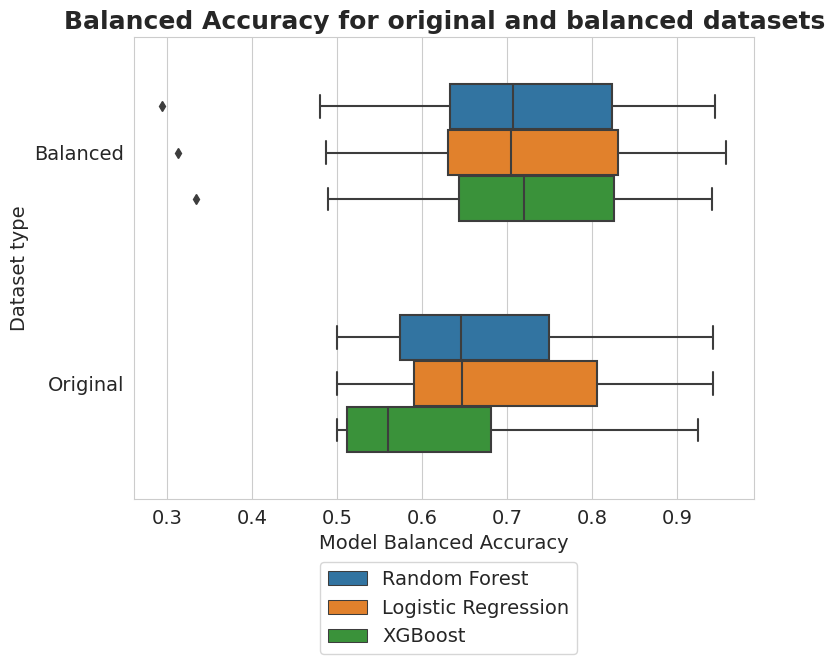

In [121]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=tmp['Dataset type'], x=tmp['Model Balanced Accuracy'], hue=tmp['Model'], width=0.6, hue_order=['Random Forest', 'Logistic Regression', 'XGBoost'])
lgd = plt.legend(bbox_to_anchor=(0.73, -0.115), fontsize=14)
plt.title('Balanced Accuracy for original and balanced datasets', fontsize=18, weight='bold')
plt.xlabel('Model Balanced Accuracy', fontsize=14)
plt.ylabel('Dataset type', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('accuracy_dataset_type.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [ ]:
tmp_results_rf = []
tmp_results_lr = []
tmp_results_xgb = []

for i in range(len(methods)):
    tmp = rf_evals[rf_evals.apply(lambda x: methods[i] in x['model'], axis=1)].copy()
    tmp['Model'] = 'Random Forest'
    tmp['Method'] = methods[i]
    tmp_results_rf.append(tmp)

    tmp = lr_evals[lr_evals.apply(lambda x: methods[i] in x['model'], axis=1)].copy()
    tmp['Model'] = 'Logistic Regression'
    tmp['Method'] = methods[i]
    tmp_results_lr.append(tmp)

    tmp = xgb_evals[xgb_evals.apply(lambda x: methods[i] in x['model'], axis=1)].copy()
    tmp['Model'] = 'XGBoost'
    tmp['Method'] = methods[i]
    tmp_results_xgb.append(tmp)

In [ ]:
tmp1 = pd.concat(tmp_results_rf)
tmp2 = pd.concat(tmp_results_lr)
tmp3 = pd.concat(tmp_results_xgb)
tmp = pd.concat([tmp1, tmp2, tmp3])

f1 = tmp.apply(lambda col: np.any([m in col.model and 'BASE_IR=0.0IR_RANGE' in col.model for m in methods]), axis=1)
f2 = tmp.apply(lambda col: 'transformed' not in col.model, axis=1)
tmp = tmp[np.logical_or(f1, f2)]

tmp.columns = ['model', 'metric', 'Model Balanced Accuracy', 'Model', 'Method']

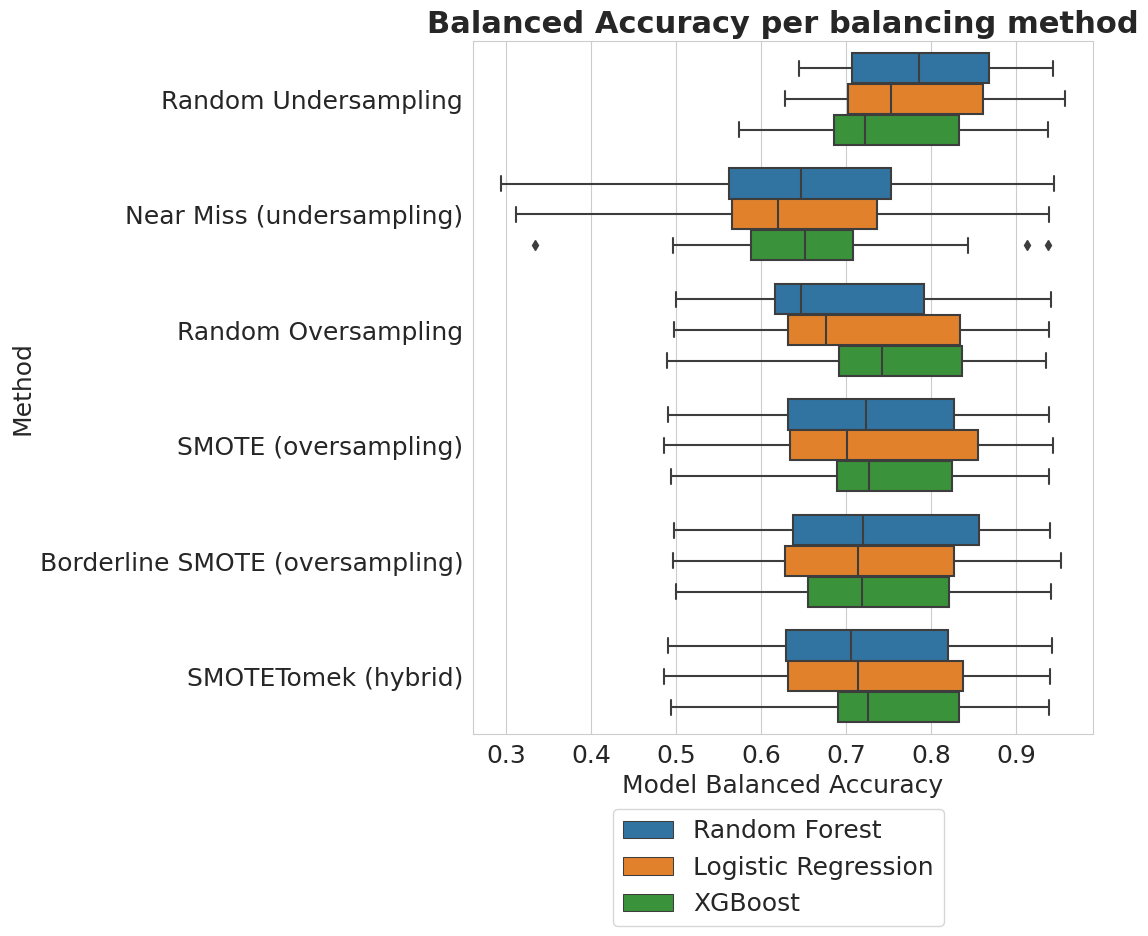

In [105]:
plt.figure(figsize=(8, 9))
ax = sns.boxplot(y=tmp['Method'], x=tmp['Model Balanced Accuracy'], hue=tmp['Model'])
plt.title('Balanced Accuracy for balancing methods')
plt.yticks(np.arange(len(names)), names)
lgd = plt.legend(bbox_to_anchor=(0.78, -0.09), fontsize=18)
plt.title('Balanced Accuracy per balancing method', fontsize=22, weight='bold')
plt.xlabel('Model Balanced Accuracy', fontsize=18)
plt.ylabel('Method', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('accuracy_method.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()